<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/S2RN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# datos disponibles en keras mnist de números
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# modelo de RNC
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# se exploran dos funciones de pérdida
loss_functions = {
    'categorical_crossentropy': 'Categorical Crossentropy',
    'mean_squared_error': 'Mean Squared Error'
}

In [ ]:
# entrenamiento del modelo
history_dict = {}
for loss_name, loss_display in loss_functions.items():
    print(f"Training with {loss_display}")
    model = create_model()
    model.compile(optimizer=Adam(), loss=loss_name, metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    history_dict[loss_name] = history

Training with Categorical Crossentropy
Epoch 1/10
1875/1875 - 57s - loss: 0.1362 - accuracy: 0.9586 - val_loss: 0.0422 - val_accuracy: 0.9871 - 57s/epoch - 30ms/step
Epoch 2/10
1875/1875 - 54s - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0365 - val_accuracy: 0.9887 - 54s/epoch - 29ms/step
Epoch 3/10
1875/1875 - 53s - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0273 - val_accuracy: 0.9915 - 53s/epoch - 28ms/step
Epoch 4/10
1875/1875 - 52s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0320 - val_accuracy: 0.9905 - 52s/epoch - 28ms/step
Epoch 5/10
1875/1875 - 53s - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0342 - val_accuracy: 0.9898 - 53s/epoch - 28ms/step
Epoch 6/10
1875/1875 - 53s - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0254 - val_accuracy: 0.9920 - 53s/epoch - 28ms/step
Epoch 7/10
1875/1875 - 53s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0304 - val_accuracy: 0.9914 - 53s/epoch - 28ms/step
Epoch 8/10
1875/1875 - 55s - loss: 0.0092 - accuracy: 0.9969 - val_loss:

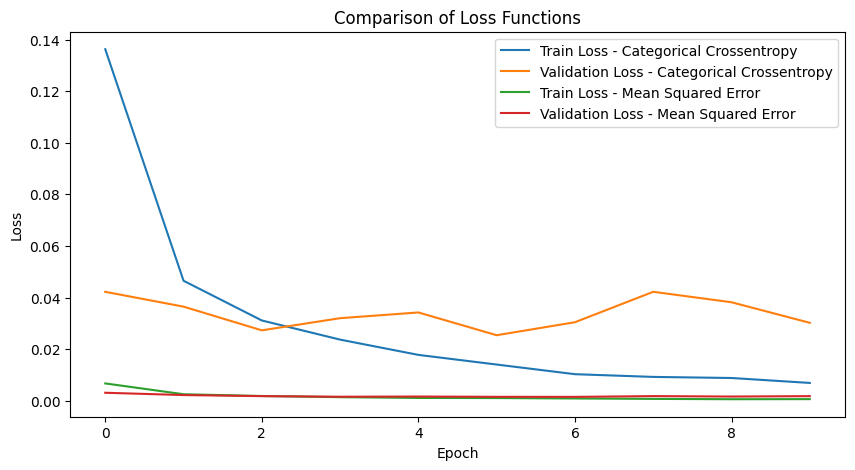

In [ ]:
# Graficar las curvas de pérdida
plt.figure(figsize=(10, 5))
for loss_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss - {loss_functions[loss_name]}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - {loss_functions[loss_name]}')
plt.title('Comparison of Loss Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()